#### Shriyansh Singh
#### CECS 406 Section 01

# Binary Classification
- Classifying movie reviews as positive or negative

Step 1: Loading the IMDB dataset

In [ ]:
# Loading the IMDB dataset
from keras.api.datasets import imdb
'''
'num_words=10000' only keeps the top 10,000 most frequently
occurring words in the training data
'''
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
# Variables 'train_data' and 'test_data' are list of reviews
'''
Each review is a list of word indices(encoding a sequence of words)
'train_labels' and 'test_labels' are lists of 0s and 1s
- 0 represents negative review
- 1 represents positive review
'''
train_data[0]
print()
train_labels[0]

1

In [ ]:
# No words index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# How you can quickly decode one of these reviews back to English words

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Decodes the review
'''
Note that the indices are offset by 3 because 0, 1, and 2
are reserved indices for "padding", "start of sequence", and "unknown"
'''
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
import numpy as np

# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # Creates an all-zero matrix of shape(len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1

    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)
# Vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# The 3-layer network
from keras import models
from keras import layers

# The model definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Making an object
# dictionary containing everything that happened during training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, # 20 iterations over all samples in the x_train and y_train tensors
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7068 - loss: 0.6123 - val_accuracy: 0.8579 - val_loss: 0.4306
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8841 - loss: 0.3755 - val_accuracy: 0.8773 - val_loss: 0.3349
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9116 - loss: 0.2744 - val_accuracy: 0.8874 - val_loss: 0.2947
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9331 - loss: 0.2151 - val_accuracy: 0.8885 - val_loss: 0.2780
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9441 - loss: 0.1780 - val_accuracy: 0.8861 - val_loss: 0.2902
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9530 - loss: 0.1513 - val_accuracy: 0.8876 - val_loss: 0.2788
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9639 - loss: 0.1300 - val_accuracy: 0.8870 - val_loss: 0.2922
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9658 - loss: 0.1152 - val_accuracy: 0.8814 - v

In [ ]:
# Showing the metrics in the dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

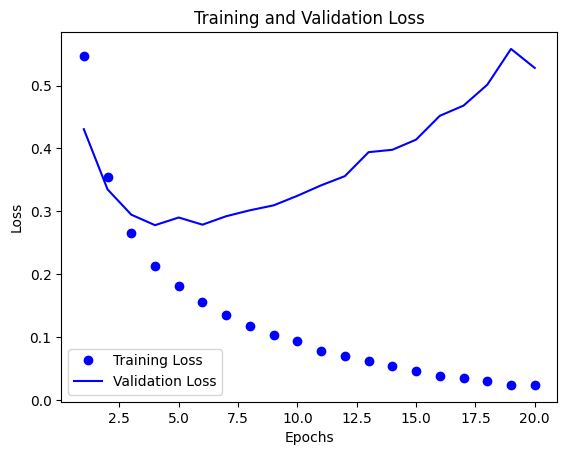

In [ ]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss') # 'bo' is for "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') # "b" is for "solid blue line"
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

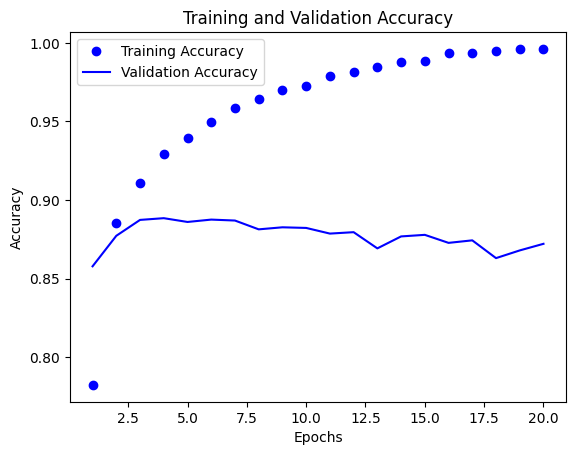

In [ ]:
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.7251 - loss: 0.5706
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9015 - loss: 0.2984
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9256 - loss: 0.2199
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9359 - loss: 0.1841
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8847 - loss: 0.2879


In [ ]:
# Final results
results # Accuracy ~88%

[0.28633224964141846, 0.8854799866676331]

In [ ]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.20657915],
       [0.99715745],
       [0.8067928 ],
       ...,
       [0.11226213],
       [0.08262385],
       [0.5635751 ]], dtype=float32)